# 1. Load dataset and import packages

In [1]:
import pandas as pandake
import numpy as numcake
import matplotlib.pyplot as plotcake
import random

# Load the data
data = pandake.read_csv('archive/UX Research.csv')

In [2]:
#print last 5 rows of data set
data[-5::]

,Name,Age,Gender,Platform,User_experience,Color Scheme,Visual Hierarchy,Typography,Images and Multimedia,Layout,...,Forms and Input Fields,Feedback and Error Messages,Loading Speed,Personalization,Accessibility,Animation and Transitions,Scrolling_Behavior,Gestures and Touch Controls,Search Functionality,Social_Media_Integration
2266,Chandana Dasgupta,41,female,Website,Efficient,5,4,4,5,4,...,4,4,5,4,4,5,4,4,4,5
2267,Subham Sen,59,male,Instagram,Inconsistent Navigation,5,5,4,5,4,...,4,4,4,5,4,4,3,4,3,3
2268,Soma Das,28,female,Instagram,Inconsistent Navigation,5,4,4,3,5,...,5,5,4,4,5,4,3,4,4,3
2269,Shreya Dasgupta,21,female,Twitter,Well-structured,4,4,4,5,5,...,3,5,5,3,3,4,3,3,4,5
2270,Abhijoy Das,22,male,Website,Intuitive,3,4,4,4,4,...,3,3,4,4,5,4,3,4,3,4


In [3]:
#print shape of dataset
numcake.shape(data)

(2271, 22)

In [4]:
#for practise sake make a new df containing age and name of people
print(len(data['Name']))
ages = data['Age'][0:5]
names = data['Name'][0:5]
pandake.concat([ages, names], axis = 1)

2271


,Age,Name
0,21,Mohammad Rahman
1,45,Fatima Khanam
2,53,Ashfaq Ahmed
3,63,Nasreen Begum
4,66,Shahidul Islam


# 2. Data Prepreperation


#### 2.1  Here we should check for values that are null and remove collums that have too many 0s

In [5]:
#Check if there are any null values
missing_percentage = data.isnull().sum() / len(data)
print(missing_percentage)

"""threshold = 20 # change accordingly
columns_to_drop = missing_percentage[missing_percentage > threshold].index
data = data.drop(columns_to_drop)"""


Name                            0.0
Age                             0.0
Gender                          0.0
Platform                        0.0
User_experience                 0.0
Color Scheme                    0.0
Visual Hierarchy                0.0
Typography                      0.0
Images and Multimedia           0.0
Layout                          0.0
Mobile Responsiveness           0.0
CTA (Call to Action) Buttons    0.0
Forms and Input Fields          0.0
Feedback and Error Messages     0.0
Loading Speed                   0.0
Personalization                 0.0
Accessibility                   0.0
Animation and Transitions       0.0
Scrolling_Behavior              0.0
Gestures and Touch Controls     0.0
Search Functionality            0.0
Social_Media_Integration        0.0
dtype: float64


'threshold = 20 # change accordingly\ncolumns_to_drop = missing_percentage[missing_percentage > threshold].index\ndata = data.drop(columns_to_drop)'

##### 2.2 We are using a likert scale, so it is important to make sure that all the grades are between 1 and 5

In [6]:
only_numbers = data.select_dtypes(include='number')

# with only numbers I am trying to get the columns that have only numbers in our data set

grater_than_5 = (only_numbers > 5).sum()

# Now I am checking if there is any value greater than 5.

print("Greater than 5")
print(grater_than_5)

# Checking if there is any value less than 1.

less_than_1 = (only_numbers < 1).sum()

print("Less than 1")
print(less_than_1)

Greater than 5
Age                             2271
Color Scheme                       0
Visual Hierarchy                   0
Typography                         0
Images and Multimedia              0
Layout                             0
Mobile Responsiveness              0
CTA (Call to Action) Buttons       0
Forms and Input Fields             0
Feedback and Error Messages        0
Loading Speed                      0
Personalization                    0
Accessibility                      0
Animation and Transitions          0
Scrolling_Behavior                 0
Gestures and Touch Controls        0
Search Functionality               0
Social_Media_Integration           0
dtype: int64
Less than 1
Age                             0
Color Scheme                    0
Visual Hierarchy                0
Typography                      0
Images and Multimedia           0
Layout                          0
Mobile Responsiveness           0
CTA (Call to Action) Buttons    0
Forms and Input Fields

 #### 2.3 Lets replace the names for privacy reasons with unique numbers (IDs)

In [7]:
NumOfPpl = len(data['Name'])
Identifiers = []
random.seed("pancake")
ids = random.sample(range(10000,99999), NumOfPpl)
for i in range(NumOfPpl):
    Identifiers.append(ids[i])
data['Name'] = Identifiers
print(data['Name'][0])
data[0:5]

52854


,Name,Age,Gender,Platform,User_experience,Color Scheme,Visual Hierarchy,Typography,Images and Multimedia,Layout,...,Forms and Input Fields,Feedback and Error Messages,Loading Speed,Personalization,Accessibility,Animation and Transitions,Scrolling_Behavior,Gestures and Touch Controls,Search Functionality,Social_Media_Integration
0,52854,21,male,Twitter,Intuitive,5,3,5,4,5,...,3,4,4,4,3,5,5,3,3,4
1,53430,45,female,Youtube,Intuitive,4,3,3,4,4,...,5,4,3,4,4,4,4,4,4,4
2,94158,53,male,Facebook,Inconsistent Navigation,3,3,4,5,4,...,5,4,5,4,5,5,5,3,4,5
3,72527,63,female,Website,Adequate,4,3,3,5,5,...,4,4,4,5,5,5,5,4,5,4
4,50523,66,male,Website,Limited Menu Options,3,3,4,5,3,...,5,5,4,4,3,3,4,5,5,5


#### 2.4. Add a collum with avg rating to the csv

In [8]:
#lets first add a row with the sum of all evaluatinos for each person
quantitative_columns = data.select_dtypes(include=['int64', 'float64']).columns
quantitative_columns = quantitative_columns.drop('Age')  # Remove 'Age' from the selection
quantitative_columns = quantitative_columns.drop('Name')  # Remove 'Name(ID)' from the selection
try: quantitative_columns = quantitative_columns.drop('avg')  # Remove 'avg' from the selection
except:
    print("Pancake")
data["avg"] = data[quantitative_columns].sum(axis=1)/len(quantitative_columns) #Calculate the average
data[0:1]

Pancake


,Name,Age,Gender,Platform,User_experience,Color Scheme,Visual Hierarchy,Typography,Images and Multimedia,Layout,...,Feedback and Error Messages,Loading Speed,Personalization,Accessibility,Animation and Transitions,Scrolling_Behavior,Gestures and Touch Controls,Search Functionality,Social_Media_Integration,avg
0,52854,21,male,Twitter,Intuitive,5,3,5,4,5,...,4,4,4,3,5,5,3,3,4,3.941176


#### 2.5 Websites evaluated

In [9]:
# First we need to discover the types of websites evaluated 
# This information is in the column "platform"

# usei para ler os dados da plataforma: df["Platform"].head()

Platforms_researched = data["Platform"].unique()

print(Platforms_researched)

# Now we have a list with all the platforms being researched at our dataset

['Twitter' 'Youtube' 'Facebook' 'Website' 'Instagram']


### For learning purposes we created 5 new dataframes, to learn how to use them and also to access them in an easy way

In [10]:
# Now I want to create 5 new dataframes, each one cointaining only one platform data... 

df_Twitter = data[data["Platform"] == "Twitter"]

df_Youtube = data[data["Platform"] == "Youtube"]

df_Facebook = data[data["Platform"] == "Facebook"]

df_Website = data[data["Platform"] == "Website"]

df_Instagram = data[data["Platform"] == "Instagram"]

# printed to check if it was correct -- print(df_Youtube)

# with that, I will be able to understand the data separately

# 3. Data Exploration

### 3.1 Now we will describe the age variable

In [11]:
#Load ages into variable
ages = data['Age']
#Print description
print(ages.describe())

count    2271.000000
mean       47.099956
std        16.747152
min        19.000000
25%        33.000000
50%        47.000000
75%        62.000000
max        76.000000
Name: Age, dtype: float64


''

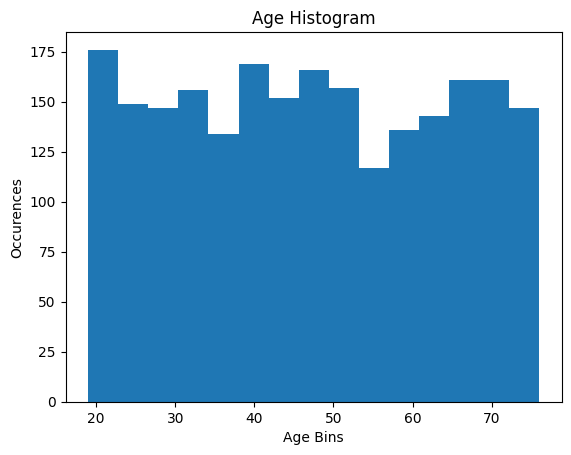

In [12]:
#Lets make a histogram
bins = 15
plotcake.hist(ages, bins)
plotcake.title('Age Histogram')
plotcake.xlabel('Age Bins')
plotcake.ylabel('Occurences')
''

## Here we can describe the qualitative measure (User Experience)


Text(0.5, 0, 'Reviews')

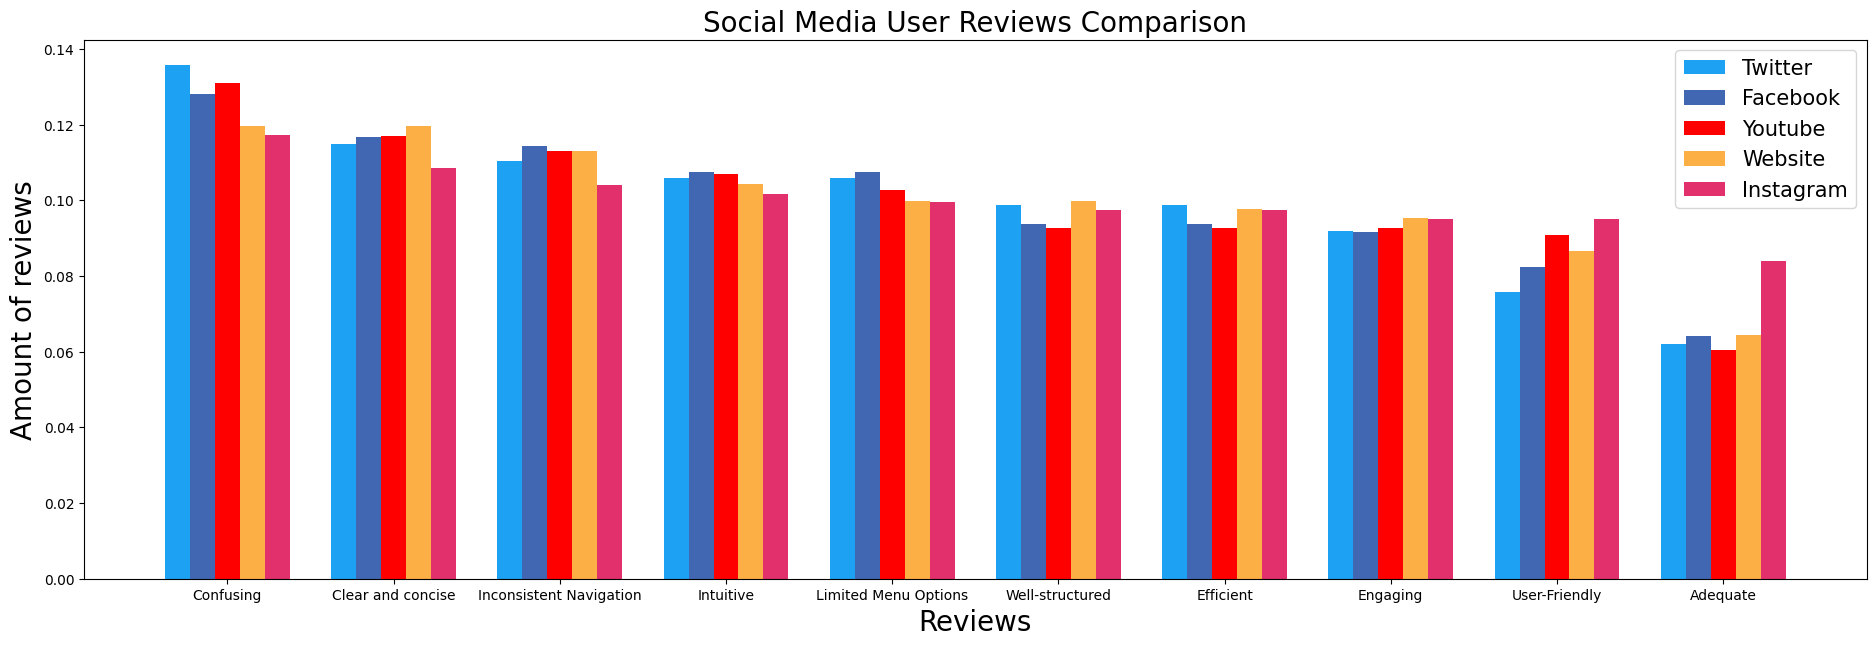

In [13]:
# make the graph above for fb, twitter etc in their brand colours
# use variables ligia made before for youtueb, twitter etc

twitter = df_Twitter["User_experience"].value_counts(normalize=True) # how many values are given to twitter specifically in this category
facebook = df_Facebook["User_experience"].value_counts(normalize=True)
youtube = df_Youtube["User_experience"].value_counts(normalize=True)
website = df_Website["User_experience"].value_counts(normalize=True)
instagram = df_Instagram["User_experience"].value_counts(normalize=True)

plotcake.figure(figsize = (23, 7)) # size of plot
plotcake.title("Social Media User Reviews Comparison", fontsize=20) # title of plot
x=twitter.index
X_axis = numcake.arange(len(x)) # amount of indices by how many given in data
plotcake.xticks(X_axis, x)

width = 0.15 # reduce bar width
plotcake.bar(X_axis - 2*width, twitter, width=width, label="Twitter", color="#1DA1F2")
plotcake.bar(X_axis - width, facebook, width=width, label="Facebook", color="#4267B2")
plotcake.bar(X_axis, youtube, width=width, label="Youtube", color="#FF0000")
plotcake.bar(X_axis + width, website, width=width, label="Website", color="#FCAF45")
plotcake.bar(X_axis + 2*width, instagram, width=width, label="Instagram", color="#E1306C")

plotcake.legend(fontsize=15)
plotcake.ylabel("Amount of reviews", fontsize=20)
plotcake.xlabel("Reviews", fontsize=20)

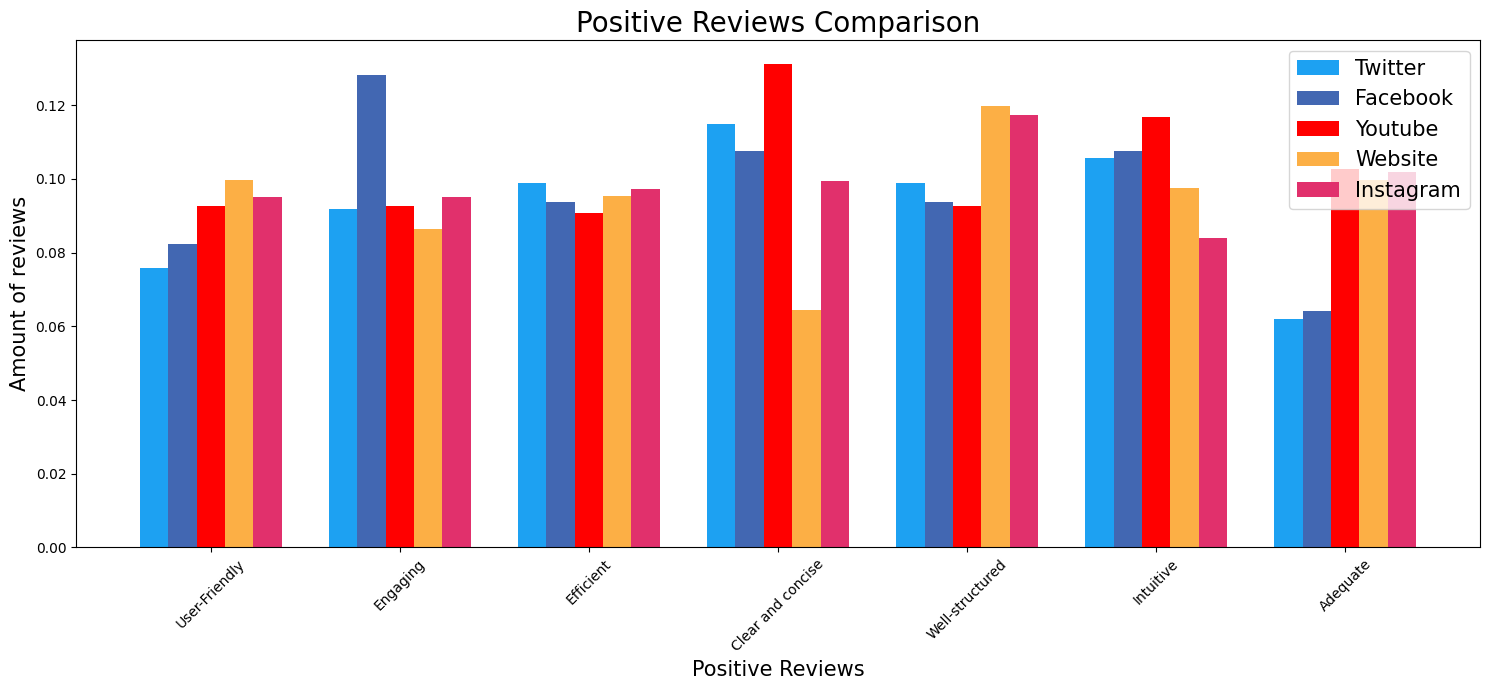

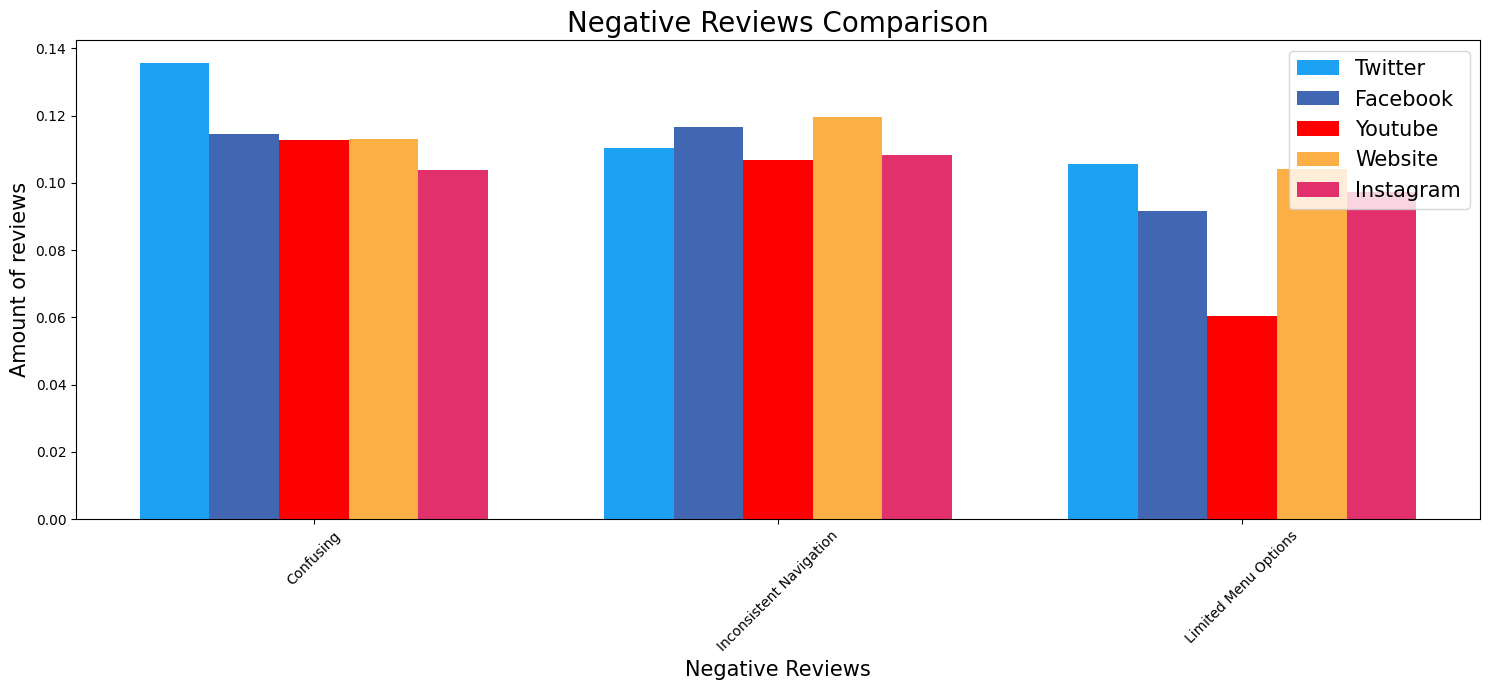

In [14]:
# Positive and negative categories
positive_categories = ["User-Friendly", "Engaging", "Efficient", "Clear and concise", "Well-structured", "Intuitive", "Adequate"]

negative_categories = ["Confusing", "Inconsistent Navigation", "Limited Menu Options"]

# data per category
positive_twitter = twitter[positive_categories]
positive_facebook = facebook[positive_categories]
positive_youtube = youtube[positive_categories]
positive_website = website[positive_categories]
positive_instagram = instagram[positive_categories]

negative_twitter = twitter[negative_categories]
negative_facebook = facebook[negative_categories]
negative_youtube = youtube[negative_categories]
negative_website = website[negative_categories]
negative_instagram = instagram[negative_categories]

# Positive chart
plotcake.figure(figsize=(15, 7))
plotcake.title("Positive Reviews Comparison", fontsize=20)
x_positive = positive_twitter.index
X_axis_positive = numcake.arange(len(x_positive))
plotcake.xticks(X_axis_positive, x_positive, rotation=45)

width = 0.15
plotcake.bar(X_axis_positive - 2 * width, positive_twitter, width=width, label="Twitter", color="#1DA1F2")
plotcake.bar(X_axis_positive - width, positive_facebook, width=width, label="Facebook", color="#4267B2")
plotcake.bar(X_axis_positive, positive_youtube, width=width, label="Youtube", color="#FF0000")
plotcake.bar(X_axis_positive + width, positive_website, width=width, label="Website", color="#FCAF45")
plotcake.bar(X_axis_positive + 2 * width, positive_instagram, width=width, label="Instagram", color="#E1306C")

plotcake.legend(fontsize=15)
plotcake.ylabel("Amount of reviews", fontsize=15)
plotcake.xlabel("Positive Reviews", fontsize=15)
plotcake.tight_layout()
plotcake.show()

# negative chart
plotcake.figure(figsize=(15, 7))
plotcake.title("Negative Reviews Comparison", fontsize=20)
x_negative = negative_twitter.index
X_axis_negative = numcake.arange(len(x_negative))
plotcake.xticks(X_axis_negative, x_negative, rotation=45)

plotcake.bar(X_axis_negative - 2 * width, negative_twitter, width=width, label="Twitter", color="#1DA1F2")
plotcake.bar(X_axis_negative - width, negative_facebook, width=width, label="Facebook", color="#4267B2")
plotcake.bar(X_axis_negative, negative_youtube, width=width, label="Youtube", color="#FF0000")
plotcake.bar(X_axis_negative + width, negative_website, width=width, label="Website", color="#FCAF45")
plotcake.bar(X_axis_negative + 2 * width, negative_instagram, width=width, label="Instagram", color="#E1306C")

plotcake.legend(fontsize=15)
plotcake.ylabel("Amount of reviews", fontsize=15)
plotcake.xlabel("Negative Reviews", fontsize=15)
plotcake.tight_layout()
plotcake.show()

### Which platform receive more positive or negative reviews?


In [15]:
# Aggregating positive and negative reviews
platforms = ["Twitter", "Facebook", "Youtube", "Website", "Instagram"]
positive_totals = [
    sum([twitter[cat] for cat in positive_categories]),
    sum([facebook[cat] for cat in positive_categories]),
    sum([youtube[cat] for cat in positive_categories]),
    sum([website[cat] for cat in positive_categories]),
    sum([instagram[cat] for cat in positive_categories]),
]
negative_totals = [
    sum([twitter[cat] for cat in negative_categories]),
    sum([facebook[cat] for cat in negative_categories]),
    sum([youtube[cat] for cat in negative_categories]),
    sum([website[cat] for cat in negative_categories]),
    sum([instagram[cat] for cat in negative_categories]),
]

# Identifying the platform with the most positive and negative reviews
most_positive = platforms[numcake.argmax(positive_totals)]
most_negative = platforms[numcake.argmax(negative_totals)]

print( "The platform that received most positive comments was", most_positive) 
print( "The platform that received most negative comments was", most_negative) 

The platform that received most positive comments was Youtube
The platform that received most negative comments was Twitter


# 4. Data analysis 

#### In this section we will investigate the quantitative evaluations for different social media and latter different age groups

### Now that we know which social media are being evaluated, we need to understand what criterias the researchers used to evaluate them using Usability Testing. 
#### With this data, in the future we can understand how the social media performed in which test and what it needs to be improved

In [16]:
print ("columns in the csv:")
print (data.columns)

columns in the csv:
Index(['Name', 'Age', 'Gender', 'Platform', 'User_experience', 'Color Scheme',
       'Visual Hierarchy', 'Typography', 'Images and Multimedia', 'Layout',
       'Mobile Responsiveness', 'CTA (Call to Action) Buttons',
       'Forms and Input Fields', 'Feedback and Error Messages',
       'Loading Speed', 'Personalization', 'Accessibility',
       'Animation and Transitions', 'Scrolling_Behavior',
       'Gestures and Touch Controls', 'Search Functionality',
       'Social_Media_Integration', 'avg'],
      dtype='object')


In [17]:
#removing the columns that we dont need

evaluation_columns = data.columns.tolist()
evaluation_columns.remove("Age")
evaluation_columns.remove("Name")
evaluation_columns.remove("Gender")
evaluation_columns.remove("Platform")
evaluation_columns.remove("User_experience")
evaluation_columns.remove("avg")

print (evaluation_columns)


['Color Scheme', 'Visual Hierarchy', 'Typography', 'Images and Multimedia', 'Layout', 'Mobile Responsiveness', 'CTA (Call to Action) Buttons', 'Forms and Input Fields', 'Feedback and Error Messages', 'Loading Speed', 'Personalization', 'Accessibility', 'Animation and Transitions', 'Scrolling_Behavior', 'Gestures and Touch Controls', 'Search Functionality', 'Social_Media_Integration']


## 4.1 How many people evaluated each website?

In [18]:
# Using len() to see how many people evaluated each website

# Twitter_len = len(df_Twitter)

# print(Twitter_len, "users evaluated Twitter in this research")

# To be easier I created a dictionary:

platform_dfs = {
    "Twitter": df_Twitter,
    "Youtube": df_Youtube,
    "Facebook": df_Facebook,
    "Website": df_Website,
    "Instagram": df_Instagram
}

# using for to access the data and print

print ("How many users evaluated each website?")
for Platform, websites in platform_dfs.items():
    print(f"{len(websites)} users evaluated {Platform} in this research")

How many users evaluated each website?
435 users evaluated Twitter in this research
496 users evaluated Youtube in this research
437 users evaluated Facebook in this research
451 users evaluated Website in this research
452 users evaluated Instagram in this research


### 4..2 What needs to be improved in each website?

In [19]:
# to start we are going to see which website performed lowest to each evaluation colums

# Create a dictionary to add the means
platform_means = {}
for platform, data in platform_dfs.items():
    platform_means[platform] = data[evaluation_columns].mean()

# creating a dataframe
platform_means_df = pandake.DataFrame(platform_means).T

# which item in each evaluation column was the worst
lowest_scores = platform_means_df.idxmin()
lowest_means = platform_means_df.min()

print("Caracteristics that have lowest score to each evaluation:")
for platform, feature in lowest_scores.items():
    print(f"{platform}: {feature} - Mean: {lowest_means[platform]:.2f}")


Caracteristics that have lowest score to each evaluation:
Color Scheme: Instagram - Mean: 4.06
Visual Hierarchy: Twitter - Mean: 4.06
Typography: Facebook - Mean: 3.89
Images and Multimedia: Twitter - Mean: 4.04
Layout: Facebook - Mean: 4.20
Mobile Responsiveness: Website - Mean: 4.20
CTA (Call to Action) Buttons: Youtube - Mean: 4.15
Forms and Input Fields: Facebook - Mean: 4.07
Feedback and Error Messages: Facebook - Mean: 4.06
Loading Speed: Website - Mean: 4.07
Personalization: Twitter - Mean: 4.07
Accessibility: Facebook - Mean: 4.06
Animation and Transitions: Instagram - Mean: 4.07
Scrolling_Behavior: Twitter - Mean: 4.09
Gestures and Touch Controls: Instagram - Mean: 4.06
Search Functionality: Website - Mean: 4.07
Social_Media_Integration: Youtube - Mean: 4.04


### Showing all the means to all evaluation to each website

<Axes: >

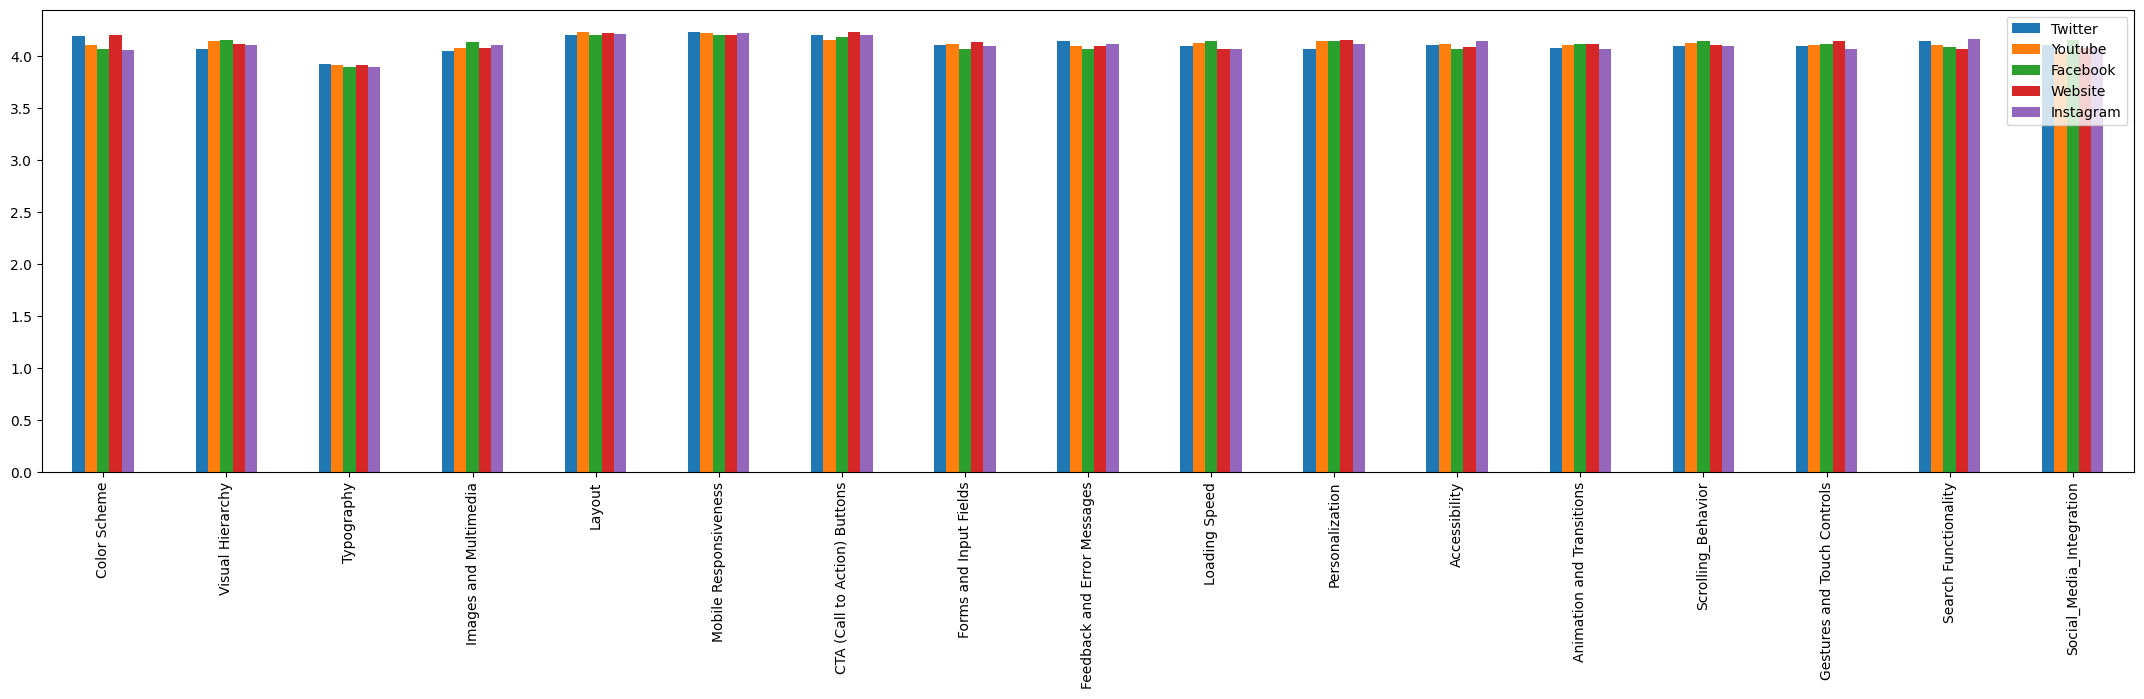

In [20]:
tp = platform_means_df.transpose()
tp.plot( kind='bar', figsize=(27,6))



### 4.2 Evaluating each website separatly

#### Twitter

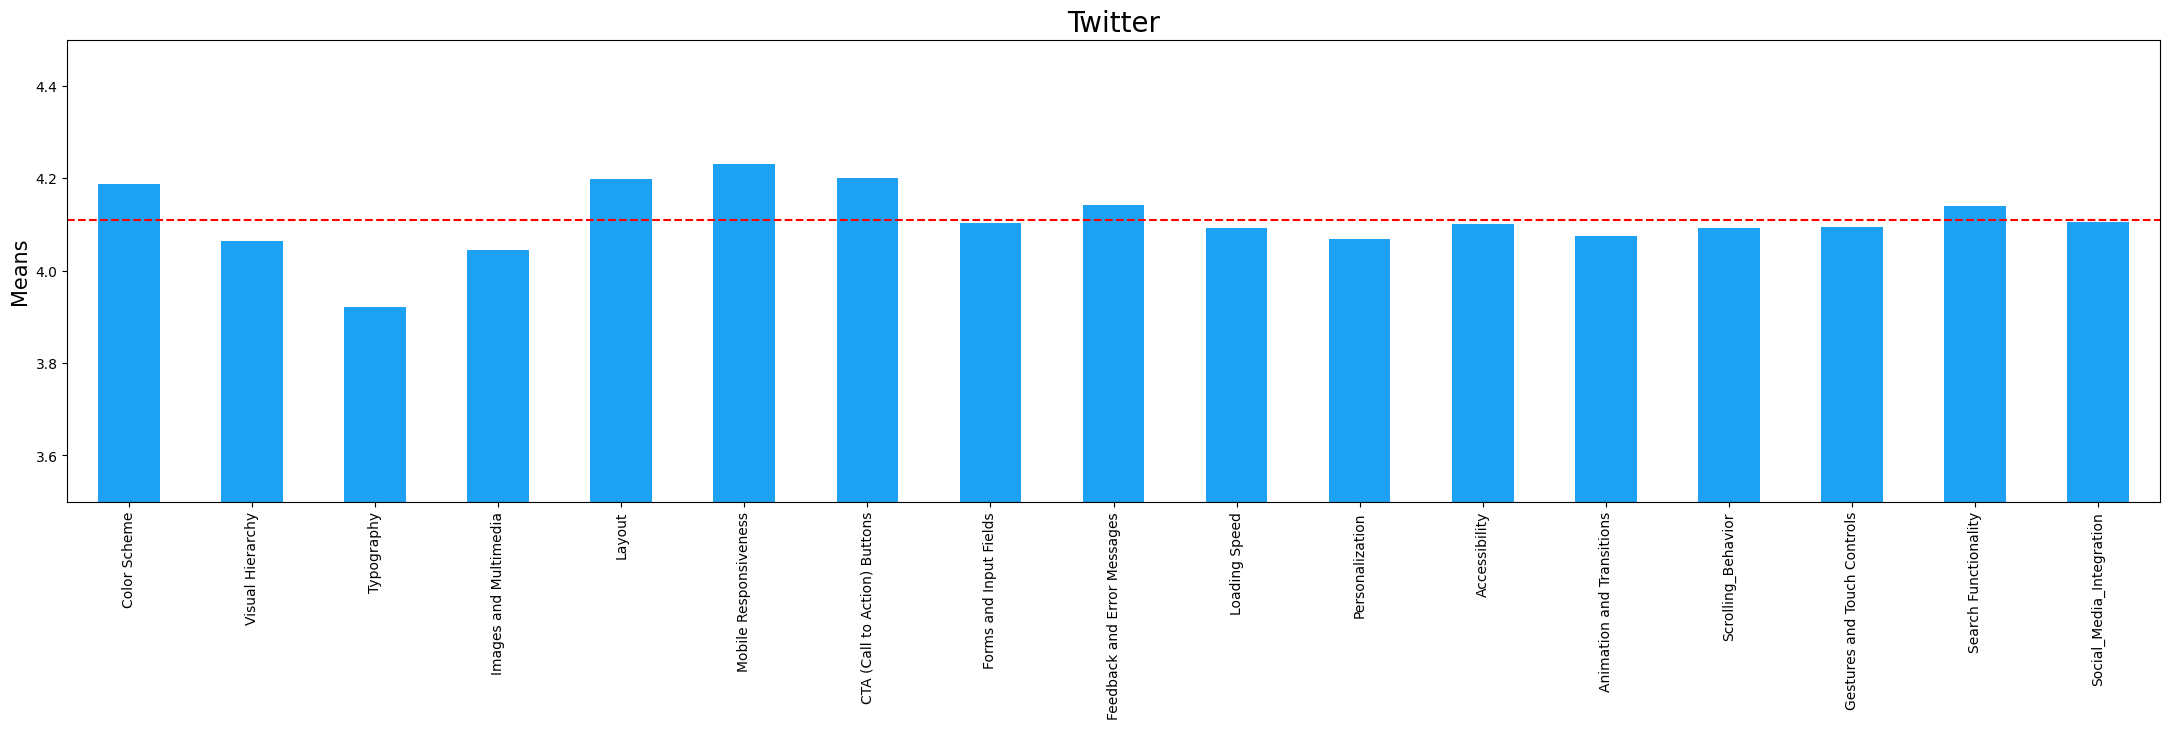

In [21]:
tt = platform_means["Twitter"]
tt.plot( kind='bar', figsize=(27,6), label="Twitter", color="#1DA1F2")
plotcake.title("Twitter", fontsize=20)
plotcake.ylabel("Means", fontsize=15)
# I am trying to have a better view to the numbers:
plotcake.ylim(3.5 , 4.5)
plotcake.axhline(y=(df_Twitter["avg"]).mean(), color='red', linestyle='--')  
# line with the average



#### Instagram


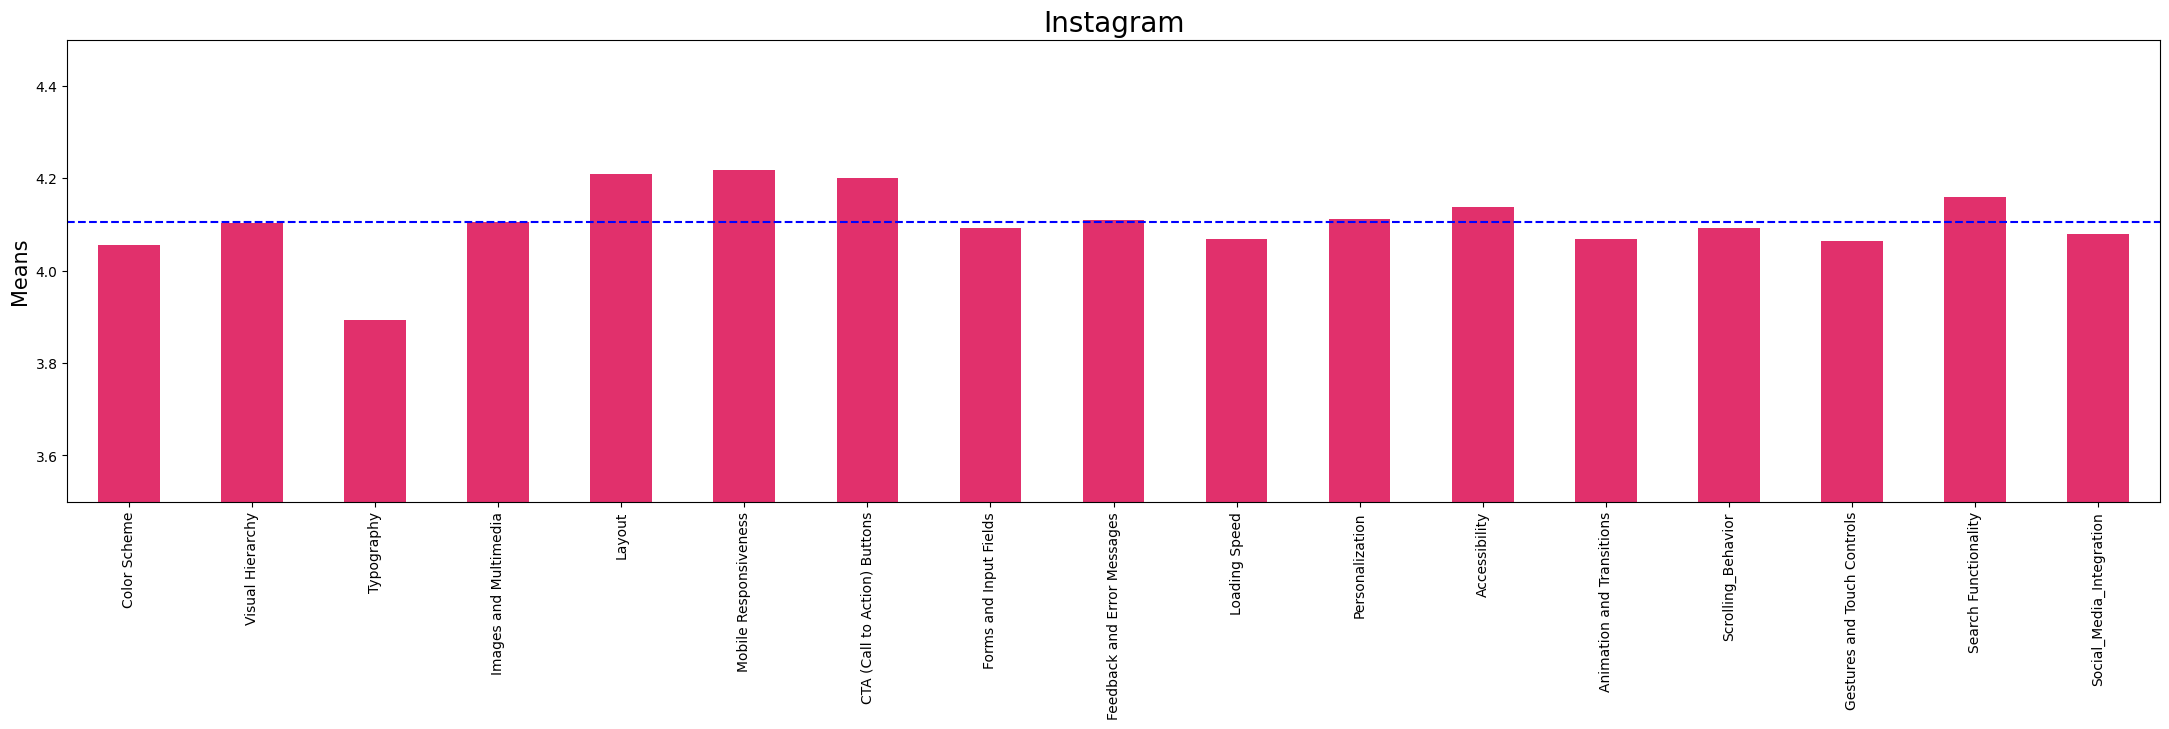

In [22]:
insta= platform_means["Instagram"]
insta.plot( kind='bar', figsize=(27,6), label="Instagram", color="#E1306C")
plotcake.title("Instagram", fontsize=20)
plotcake.ylabel("Means", fontsize=15)
# I am trying to have a better view to the numbers:
plotcake.ylim(3.5 , 4.5)
# line with the average
plotcake.axhline(y=(df_Instagram["avg"]).mean(), color='blue', linestyle='--')  

#### Youtube


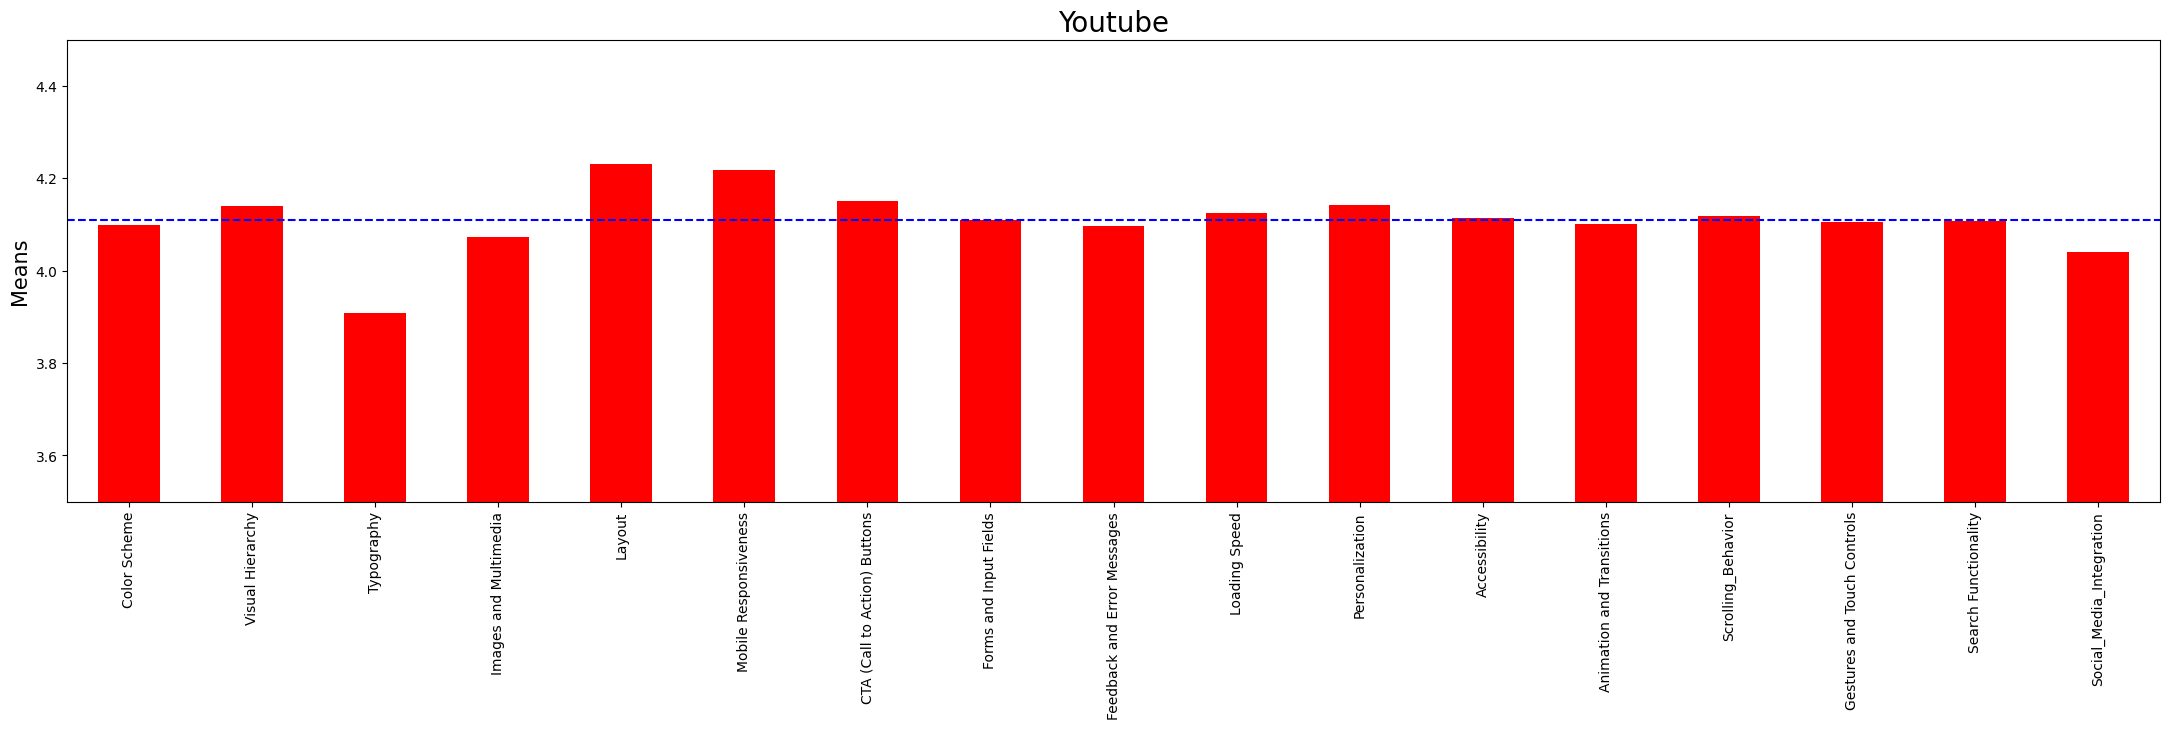

In [23]:
yt= platform_means["Youtube"]
yt.plot( kind='bar', figsize=(27,6), label="Youtube", color="#FF0000")
plotcake.title("Youtube", fontsize=20)
plotcake.ylabel("Means", fontsize=15)

# I am trying to have a better view to the numbers:
plotcake.ylim(3.5 , 4.5)
# line with the average
plotcake.axhline(y=(df_Youtube["avg"]).mean(), color='blue', linestyle='--')  

#### Website

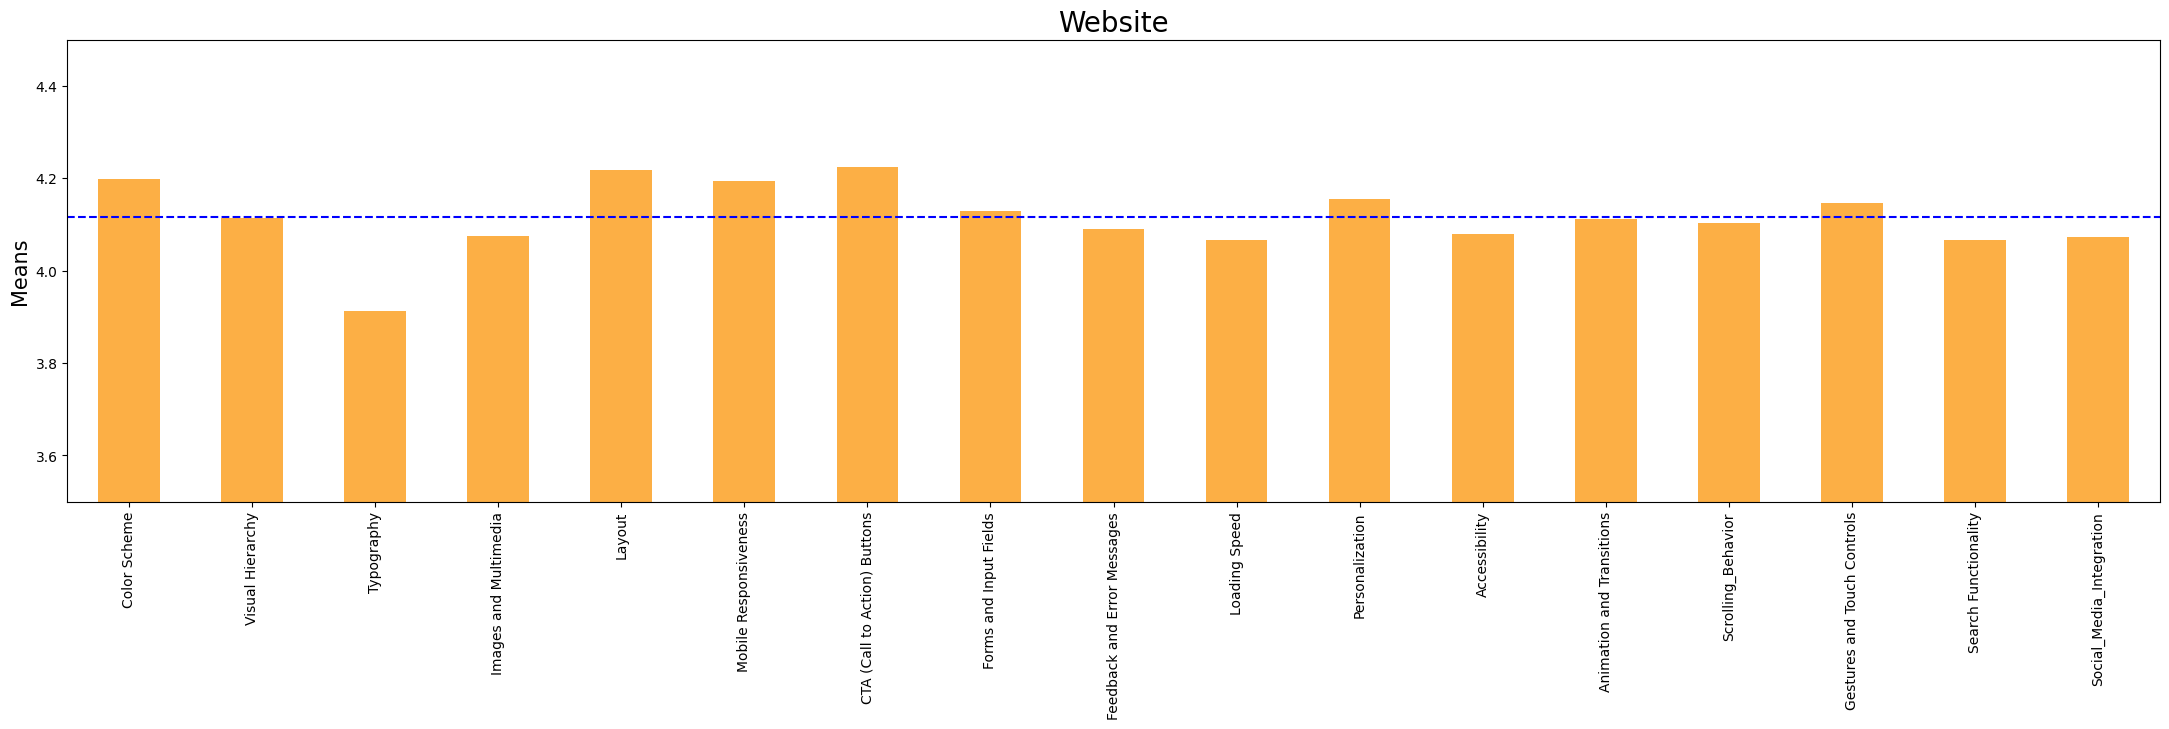

In [24]:
web= platform_means["Website"]
web.plot( kind='bar', figsize=(27,6), label="Website", color="#FCAF45")
plotcake.title("Website", fontsize=20)
plotcake.ylabel("Means", fontsize=15)
# I am trying to have a better view to the numbers:
plotcake.ylim(3.5 , 4.5)
# line with the average
plotcake.axhline(y=(df_Website["avg"]).mean(), color='blue', linestyle='--')

#### Facebook

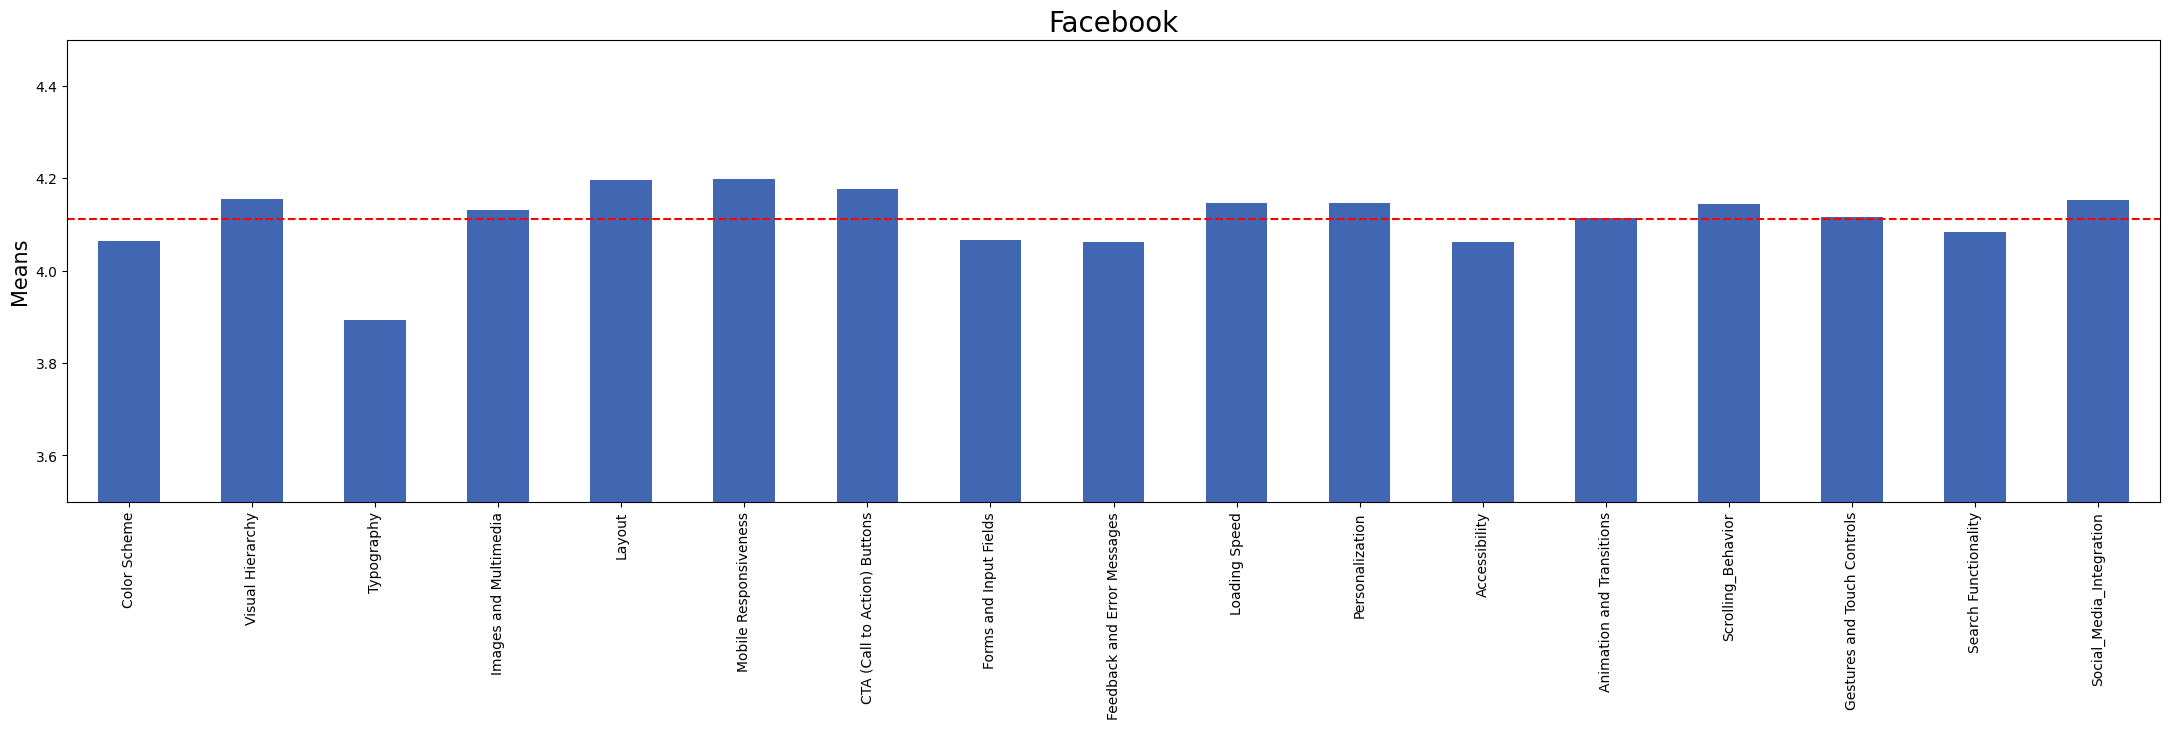

In [25]:
fb= platform_means["Facebook"]
fb.plot( kind='bar', figsize=(27,6), label="Facebook", color="#4267B2")
plotcake.title("Facebook", fontsize=20)
plotcake.ylabel("Means", fontsize=15)
# I am trying to have a better view to the numbers:
plotcake.ylim(3.5 , 4.5)
# line with the average
plotcake.axhline(y=(df_Facebook["avg"]).mean(), color='red', linestyle='--')

### 4.3 Average Ratings

C:\Users\ligia\AppData\Local\Temp\ipykernel_21208\3970439089.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings = data.groupby('AgeGroup')['avg'].mean()  # Assuming 'avg' is your rating column


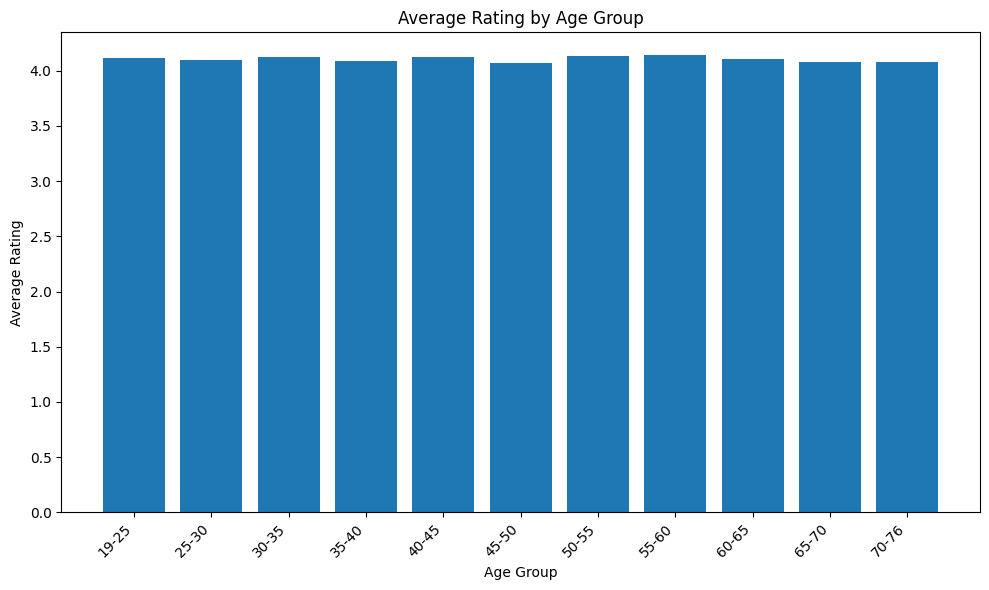

In [26]:
# Defining the age ranges and labels
bins = [19, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 76]
labels = ['19-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-76']

# Createing age groups using pd.cut - cut could convert ages to groups of age ranges
data['AgeGroup'] = pandake.cut(data['Age'], bins=bins, labels=labels, right=False)

# Calculate average rating for each age group
average_ratings = data.groupby('AgeGroup')['avg'].mean()  # Assuming 'avg' is your rating column

# Create the bar plot
plotcake.figure(figsize=(10, 6))  # Adjust figure size if needed
plotcake.bar(average_ratings.index, average_ratings.values)

# Add a line to the scatter plot
#plotcake.plot(average_ratings.index, average_ratings.values) # This draws a line connecting the points

#Plot Design
plotcake.xlabel("Age Group")
plotcake.ylabel("Average Rating")
plotcake.title("Average Rating by Age Group")
plotcake.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plotcake.tight_layout()  # Adjust layout to prevent labels from overlapping
plotcake.show()


# 5. Advanced Data Analysis

####  Here we plot the averages and try to fit a function to see if it fits into a normal distribution (anton)

[np.float64(3.588235294117647), np.float64(3.6470588235294117), np.float64(3.7058823529411766), np.float64(3.764705882352941), np.float64(3.823529411764706), np.float64(3.8823529411764706), np.float64(3.9411764705882355), np.float64(4.0), np.float64(4.0588235294117645), np.float64(4.117647058823529), np.float64(4.176470588235294), np.float64(4.235294117647059), np.float64(4.294117647058823), np.float64(4.352941176470588), np.float64(4.411764705882353), np.float64(4.470588235294118), np.float64(4.529411764705882)]


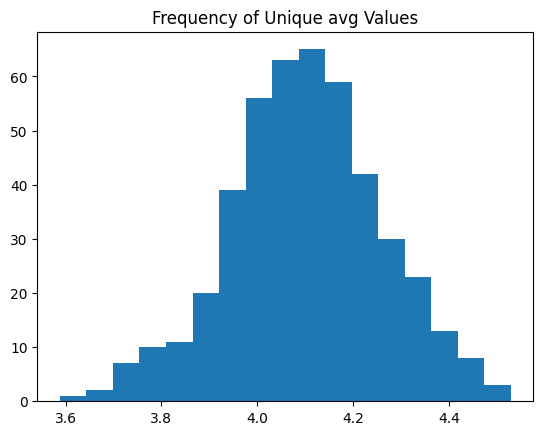

In [27]:
import matplotlib.pyplot as plt 

# Plot the frequencies
def plot_scatter(data):
    # Sort unique values
    unique_sums = sorted(data['avg'].unique())
    print(unique_sums)
    # Calculate frequencies using value_counts and map them to unique_sums
    freq = [data['avg'].value_counts().get(value, 0) for value in unique_sums]
    plt.hist(data['avg'], bins = 17)
    #plt.plot(unique_sums, freq, alpha = 0.5, color = "orange")

    plt.title('Frequency of Unique avg Values')
    plt.show()
    ""

plot_scatter(data)

#estimate the curve


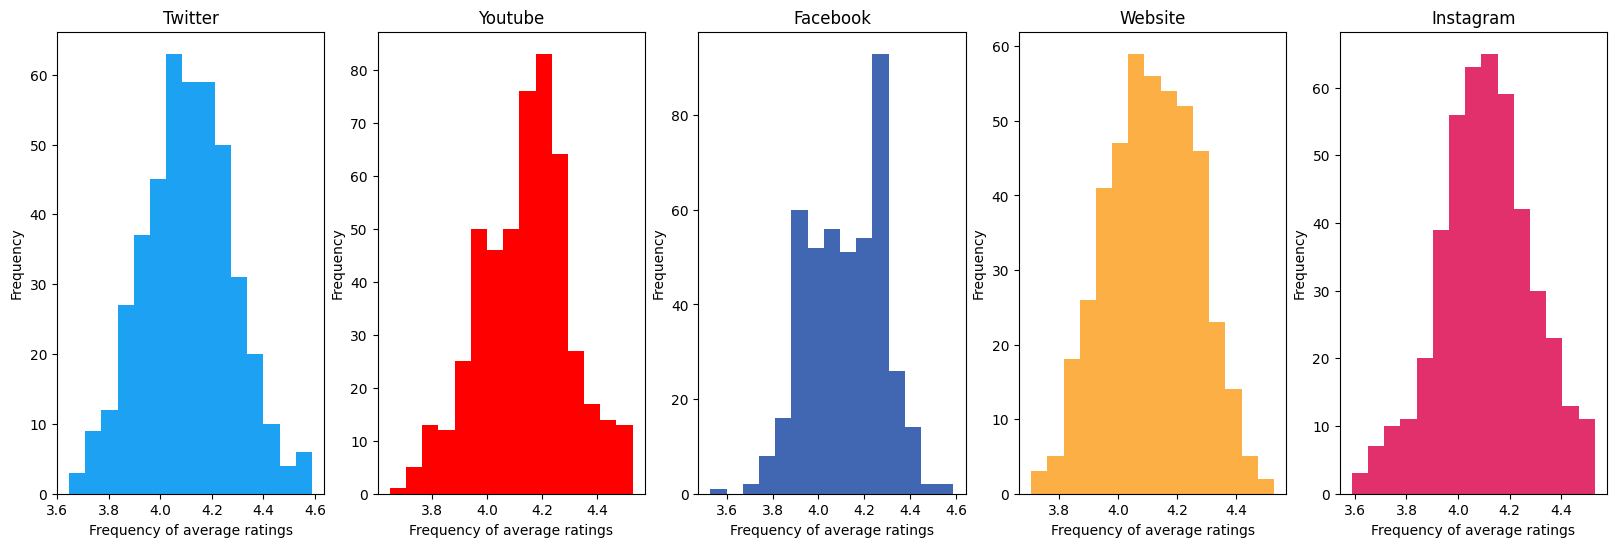

In [28]:
import matplotlib.pyplot as plt 

def plot_scatter(datas, names, col):
    
    fig, ax  = plt.subplots(1, 5, figsize=(20, 6))   # Create 5 subplots
    
    for i in range(len(names)):
         # Sort unique values
        unique_sums = sorted(datas[i]['avg'].unique())
        # Calculate frequencies using value_counts and map them to unique_sums
        freq = [datas[i]['avg'].value_counts(normalize = True).get(value, 0) for value in unique_sums]
        #ax.scatter(unique_sums, freq, label = names[i])
        #ax.plot(unique_sums, freq, alpha = 0.5, linestyle = "dashed")#,  label = names[i])
        ax[i].hist(datas[i]['avg'], bins = 15, color = col[i])
        ax[i].title.set_text(names[i])
        ax[i].set_xlabel('Frequency of average ratings')
        ax[i].set_ylabel('Frequency')
    
    #plt.legend()
    plt.show()

colors = ["#1DA1F2","#FF0000", "#4267B2",  "#FCAF45","#E1306C" ]
platforms = ['Twitter', 'Youtube', 'Facebook', 'Website','Instagram']
datas = [df_Twitter, df_Youtube, df_Facebook, df_Website, df_Instagram]
plot_scatter(datas, platforms, colors)

''

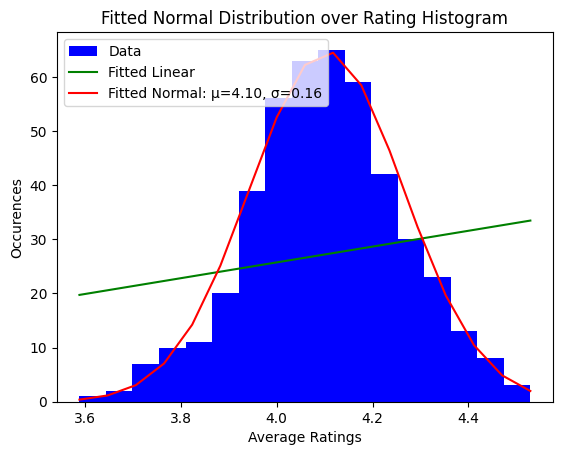

In [29]:
from scipy.optimize import curve_fit
from scipy.stats import norm
import numpy as np

x= sorted(data['avg'].unique())
y = [data['avg'].value_counts(normalize = False).get(value, 0) for value in x]

#Fit Linear Function
def linear_func(x, a, b):
    return a * x + b

params_linear, pcov = curve_fit(linear_func, x,y)
fitted_y_linear = linear_func(numcake.array(x), *params_linear)

# Fit Quadratic Function
def quad_func(x, a, b, c):
    return a * x**2 + b * x + c
params_quad, cov_quad = curve_fit(quad_func, x, y)
fitted_y_quad = quad_func(numcake.array(x), *params_quad)


#Fit Normal Distribution
def norm_func(x, mu, sigma, amplitude):
    return amplitude * norm.pdf(x, mu, sigma)


params_norm, _ = curve_fit(norm_func, x, y)#, p0=[np.mean(x), np.std(x), max(y)])
fitted_y_norm = norm_func(np.array(x), *params_norm)

"""
plt.figure()
plt.scatter(x,y)
plt.plot(x, fitted_y_linear)
plt.show()
"""

"""
plt.figure()
plt.scatter(x,y)
plt.plot(x, fitted_y_quad)
plt.show()
"""

plt.figure()
plt.hist(data['avg'], bins = 17, label='Data', color='blue')
plt.plot(x, fitted_y_linear, label = 'Fitted Linear ', color = 'green')
plt.plot(x, fitted_y_norm, label=f'Fitted Normal: μ={params_norm[0]:.2f}, σ={params_norm[1]:.2f}', color='red')
plt.title('Fitted Normal Distribution over Rating Histogram')
plt.ylabel('Occurences')
plt.xlabel('Average Ratings')
plt.savefig('fitted Normal distribution.png')
plt.legend()
"""
plt.figure()
plt.plot(x, fitted_y_linear, label="Linear Fit")
plt.plot(x, fitted_y_quad, label="Quadratic Fit")
plt.plot(x, fitted_y_norm, label=f'Fitted Normal: μ={params_norm[0]:.2f}, σ={params_norm[1]:.2f}', color='red')
plt.scatter(x,y, label = 'Datapoints')
plt.legend()
plt.show()"""

''

In [30]:
from sklearn import svm
from sklearn.model_selection import train_test_split
clf = svm.SVC(gamma='auto', C=100)
dataML = pandake.read_csv('archive/UX Research.csv')

quantitative_columns = data.select_dtypes(include=['int64', 'float64']).columns
#quantitative_columns = quantitative_columns.drop('Name')  # Remove 'Name(ID)' from the selection
#quantitative_columns = quantitative_columns.drop('avg')  # remove avg cause its just a sum of other features


x = dataML[quantitative_columns]
y = dataML['Platform']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
clf.fit(x_train, y_train)

KeyError: "['avg'] not in index"

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
results = []
Cs = [1,5,10,25,50,100,150]
for i in Cs:
    clf = svm.SVC(gamma='auto', C=i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    results.append(accuracy_score(y_test, y_pred))
results

In [ ]:
plt.scatter(Cs, results, label = 'performance SVC')
plt.plot(Cs, results, alpha = 0.3)
plt.title('Performance of SVC in dependence of C')
plt.xlabel("Value of C")
plt.xticks(Cs)
plt.ylabel("Performance of model")
plt.axhline(1/5, label = "Random Guessing", color = 'red', alpha = 0.5, linestyle = 'dashed')
plt.legend()
plt.savefig('SVC.png')
plt.show()


In [ ]:
X_test = x_test
X_train=x_train
clf = svm.SVC(gamma=0.001, C=100.)

# Set batch size for training (e.g., 32 samples per batch)
batch_size = 32
n_batches = len(X_train) // batch_size  # Number of batches

# Initialize a list to store accuracy after each batch
batch_accuracies = []

# Train in batches
for i in range(n_batches + 1):  # Iterate through all batches
    # Get the current batch slice
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    
    if end_idx > len(X_train):  # If it's the last batch and the size is less than the batch size
        end_idx = len(X_train)
    
    # Get the current batch of training data
    X_batch = X_train[start_idx:end_idx]
    y_batch = y_train[start_idx:end_idx]
    
    # Fit the classifier on the current batch
    clf.fit(X_batch, y_batch)
    
    # Make predictions on the test set after each batch
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy of the model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy to the list
    batch_accuracies.append(accuracy)
    


# The list `batch_accuracies` now contains the accuracy after each batch
# You can further analyze or plot the accuracy progression if needed
plt.plot(batch_accuracies)
plt.title("Model Accuracy after each Batch SVM")
plt.xlabel("batch itteration")
plt.ylabel("model accuracy")

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve




# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(max_iter=1800),
                                                              X = x, 
                                                              y = y, 
                                                              train_sizes = [25,50,75,100,200,300,500,1000,1800], 
                                                              cv = 5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Test score', color='green')
plt.axhline(1/5, label = "Random Guessing", color = 'red', alpha = 0.5, linestyle = 'dashed')
plt.ylabel('Accuracy score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning Curves Logistic Regression', fontsize=18, y=1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.grid(True)
plt.legend()
plt.savefig('linearReg.png')

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
clf = svm.SVC(gamma=0.001, C=100.)

data = pandake.read_csv('archive/UX Research.csv')

y = data['Gender']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve




# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(max_iter=1800),
                                                              X = x, 
                                                              y = y, 
                                                              train_sizes = [25,50,75,100,200,300,500,1000,1800], 
                                                              cv = 5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Test score', color='green')
plt.ylabel('Accuracy score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning Curves Logistic Regression', fontsize=18, y=1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.grid(True)
plt.legend()

In [ ]:
value_counts = data["User_experience"].value_counts()
plt.figure(figsize=(20,7))
plt.bar(value_counts.index, value_counts)


In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Occurences")
plt.hist(ages, 15)
plt.savefig('age_dist.png')
plt.show()

In [ ]:
data[quantitative_columns].corr()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, learning_curve


# 5-Fold Cross-validation
cv_results = cross_validate(model, x, y, cv=5)

# Mean of accuracies
accuracy = cv_results['test_score'].mean()
print(f'Mean accuracy from cross-validation: {accuracy:.4f}')

# Get train scores, train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                          X=x, 
                                                          y=y, 
                                                          train_sizes=[25, 50, 75, 100, 200, 300, 500, 1000, 1816], 
                                                          cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Test score', color='green')
plt.ylabel('Accuracy score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning Curves', fontsize=18, y=1.03)
plt.legend()
plt.grid(True)
plt.show()
